In [76]:
# read in modules

import os
import json
import requests
import pandas as pd
import numpy as np

In [77]:
# create our path name and read in comoddity codes

path = "in_data"
coms = "comcodes.csv"
comcodes = os.path.join(path,coms)
coms = pd.read_csv(comcodes)

In [78]:
coms.columns = ['comcode','JQ']

In [79]:
JQs = [i for i in coms.JQ if str(i).startswith('5')]
print(JQs)

HSs = coms[coms.JQ.isin(['5.1'])]
print(HSs)

['5.1', '5.2']
    comcode   JQ
33   440131  5.1


In [80]:
# build a string formatted correctly of all of the commoddity codes we need

comarray = HSs.comcode.unique()
comlist = list(comarray)

comstr = str()
for idx,i in enumerate(comlist):
    val = str(i)
    if idx == 0:
        comstr = val
    else:
        comstr = comstr + '%2C' + val

print(comstr)

440131


In [81]:
minyear = 2000
maxyear = 2018
comcode = comstr
token = "Dpj7YgwAXqJJQ1HDfa4pInbDfsNK6RbbAGdIirJdSAVUWVXLaPu/v7NMP4ZLqNnAiLLNirmZyPP1rHOhQmqKI35TBzlb+5eEtPAy/0y0GmiKnubTtpoXkIynNpRRxxH2tJyijaK7ryBs3/urUceZFA=="

In [82]:
years = list(range(minyear,maxyear + 1))
yearstr = str()

for idx,i in enumerate(years):
    if idx < len(years) - 1:
        val = str(i)
        yearstr = '%2C' + val + yearstr
    else:
        val = str(i)
        yearstr = val + yearstr
        print(yearstr)
        

2018%2C2017%2C2016%2C2015%2C2014%2C2013%2C2012%2C2011%2C2010%2C2009%2C2008%2C2007%2C2006%2C2005%2C2004%2C2003%2C2002%2C2001%2C2000


In [83]:
URLcountries = "https://comtrade.un.org/Data/cache/reporterAreas.json"
    
datacodes = requests.get(URLcountries)

jsoncodes = datacodes.json()

countrycodes = jsoncodes['results']

cc = pd.DataFrame.from_records(countrycodes)

print(cc.head())


    id         text
0  all          All
1    4  Afghanistan
2    8      Albania
3   12      Algeria
4   20      Andorra


In [84]:
print(cc.loc[cc['text'] == 'USA'])

      id text
245  842  USA


In [85]:
URL = "http://comtrade.un.org/api/get?"

parameters = {'token' : '{}'.format(token),
    'max' : 100000000,
    'type': 'C', # type C = commodities
    'freq' : 'A', # frequency A = annual
    'ps' : '{}'.format(yearstr),
    'px' : 'H4', # H4 indicates we are using HS - 2012 codes
    'r' : 842, # this is the reporter
    'p' : 0, #  this the the partner set to (ALL)
    'rg' : '1%2C2', # rg is the trade flow and we take import and exports
    'cc' : '{}'.format(comcode)} # commodity codes

parstring = str()
for i in parameters.keys():
    key = str(i)
    val = str(parameters[i])
    if i != 'cc':
        urlval = key+"="+val+"&"
        parstring = parstring + urlval
    else:
        urlval = key+"="+val
        URL = URL + parstring + urlval
        print(URL)
        
data = requests.get(URL)

http://comtrade.un.org/api/get?token=Dpj7YgwAXqJJQ1HDfa4pInbDfsNK6RbbAGdIirJdSAVUWVXLaPu/v7NMP4ZLqNnAiLLNirmZyPP1rHOhQmqKI35TBzlb+5eEtPAy/0y0GmiKnubTtpoXkIynNpRRxxH2tJyijaK7ryBs3/urUceZFA==&max=100000000&type=C&freq=A&ps=2018%2C2017%2C2016%2C2015%2C2014%2C2013%2C2012%2C2011%2C2010%2C2009%2C2008%2C2007%2C2006%2C2005%2C2004%2C2003%2C2002%2C2001%2C2000&px=H4&r=842&p=0&rg=1%2C2&cc=440131


In [86]:
datajson = data.json()

print(datajson['validation'])

{'status': {'name': 'Ok', 'value': 0, 'category': 0, 'description': '', 'helpUrl': 'For more reference visit http://comtrade.un.org/data/dev/portal/'}, 'message': None, 'count': {'value': 14, 'started': '2019-12-09T20:23:49.240577+01:00', 'finished': '2019-12-09T20:23:49.4280615+01:00', 'durationSeconds': 0.1874845}, 'datasetTimer': {'started': '2019-12-09T20:23:49.240577+01:00', 'finished': '2019-12-09T20:23:49.5999524+01:00', 'durationSeconds': 0.35937539999999996}}


In [87]:
ncp = pd.DataFrame.from_records(datajson['dataset'])    

In [88]:
print(min(ncp.yr),max(ncp.yr))
print(ncp.cmdCode.unique())

2012 2018
['440131']


In [89]:
columnlist = ['yr','rtTitle','ptTitle','rgCode','cmdCode','TradeQuantity','NetWeight']

for i in list(ncp):
    if not i in columnlist:
        del ncp[i]
        
print(ncp.head())

     yr  rgCode rtTitle ptTitle cmdCode  TradeQuantity   NetWeight
0  2012       1     USA   World  440131       86736450    86736450
1  2012       2     USA   World  440131     1898124809  1898124809
2  2013       1     USA   World  440131      152441735   152441735
3  2013       2     USA   World  440131     2882516750  2882516750
4  2014       1     USA   World  440131      219986490   219986490


In [90]:
ncp = ncp[ncp.rgCode == 2]
print(ncp)

      yr  rgCode rtTitle ptTitle cmdCode  TradeQuantity   NetWeight
1   2012       2     USA   World  440131     1898124809  1898124809
3   2013       2     USA   World  440131     2882516750  2882516750
5   2014       2     USA   World  440131     4055732444  4055732444
7   2015       2     USA   World  440131     4668774776  4668774776
9   2016       2     USA   World  440131     4736570932  4736570932
11  2017       2     USA   World  440131     5148095914  5148095914
13  2018       2     USA   World  440131     6017277722  6017277722


In [91]:
ncp.loc[:,'export_weight'] = ncp.NetWeight/1000000000

In [92]:
ncp

yr  rgCode rtTitle ptTitle cmdCode  TradeQuantity   NetWeight  \
1   2012       2     USA   World  440131     1898124809  1898124809   
3   2013       2     USA   World  440131     2882516750  2882516750   
5   2014       2     USA   World  440131     4055732444  4055732444   
7   2015       2     USA   World  440131     4668774776  4668774776   
9   2016       2     USA   World  440131     4736570932  4736570932   
11  2017       2     USA   World  440131     5148095914  5148095914   
13  2018       2     USA   World  440131     6017277722  6017277722   

    export_weight  
1        1.898125  
3        2.882517  
5        4.055732  
7        4.668775  
9        4.736571  
11       5.148096  
13       6.017278

In [93]:
ncp = ncp[['yr','export_weight']]

In [94]:
ncp

yr  export_weight
1   2012       1.898125
3   2013       2.882517
5   2014       4.055732
7   2015       4.668775
9   2016       4.736571
11  2017       5.148096
13  2018       6.017278

In [95]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')

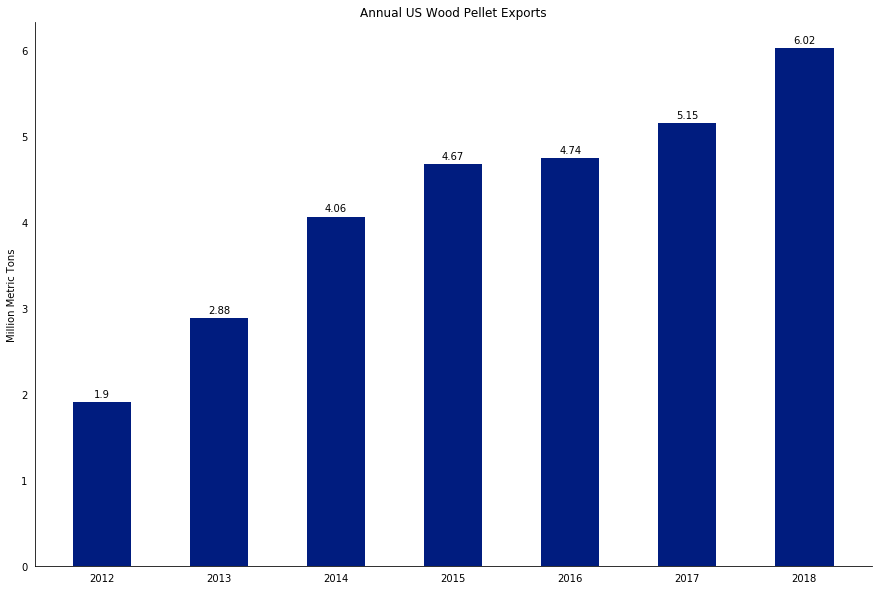

In [96]:
plt.rcParams["figure.figsize"] = (15,10)
fig,ax = plt.subplots()


#plt.box(False)
bar = ax.bar(ncp.yr, ncp.export_weight, width = .5)

ax.set_ylabel('Million Metric Tons')
ax.set_title('Annual US Wood Pellet Exports')
ax.tick_params(left=False, bottom=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# function taken from https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bar)

plt.show()

In [97]:
eupath = os.path.join(path,"eurostat_imports.csv")

eu = pd.read_csv(eupath)

In [98]:
eu = eu.rename(columns={'Unnamed: 0':'year'})

In [99]:
eu = eu.astype(float)
eu.iloc[:,1:4] = eu.iloc[:,1:4].div(10000000)

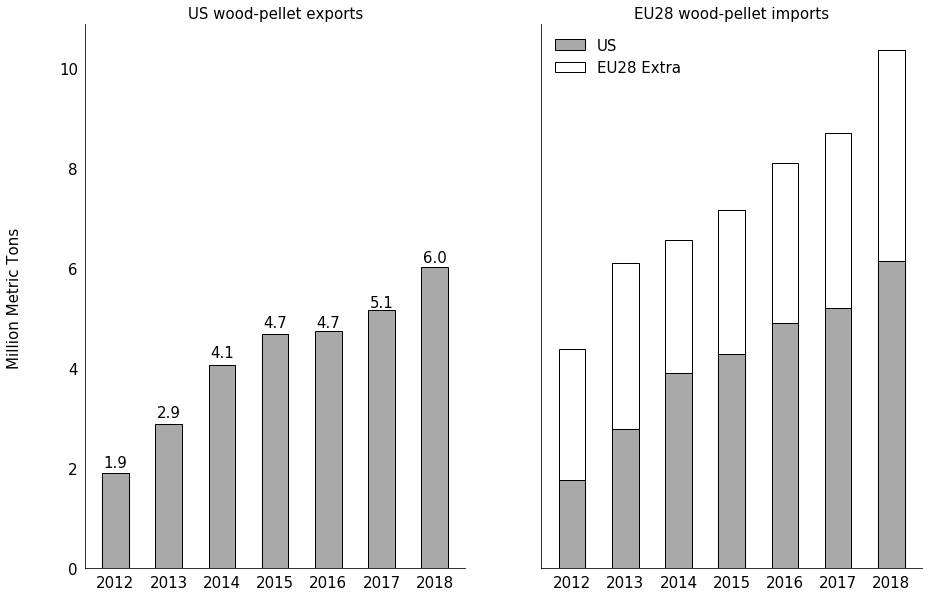

In [111]:
fig,ax = plt.subplots(1,2, sharey = True, sharex = True)

rect = ax[0].bar(ncp.yr, ncp.export_weight, width = .5, color = 'darkgray',edgecolor = 'black')

rect1 = ax[1].bar(eu.year, eu.US, width = .5,color='darkgray',edgecolor = 'black')

rect2 = ax[1].bar(eu.year, eu.extra_US, width = .5, bottom=eu.US, color = 'white',edgecolor = 'black')

fig.text(0.06, 0.5, 'Million Metric Tons', ha='center', va='center', rotation='vertical',fontsize = 15)
ax[0].tick_params(left='off', bottom='off')
ax[1].tick_params(left='off', bottom='off')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].set_title('US wood-pellet exports',fontsize = 15)
ax[1].set_title('EU28 wood-pellet imports',fontsize = 15)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 1)
        ax[0].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = 15)
autolabel(rect)

ax[1].legend((rect1[0], rect2[0]), ('US', 'EU28 Extra'), frameon = False,prop={'size': 15})


ax[0].tick_params(labelsize = 15)
ax[1].tick_params(labelsize = 15)

In [101]:
import subprocess

def plot_as_emf(**kwargs):
    # finds inkscape to convert svg file to emf file...
    inkscape_path = kwargs.get('inkscape', "C://Program Files//Inkscape//inkscape.exe")
    filepath = kwargs.get('filename', None)

    if filepath is not None:
        path, filename = os.path.split(filepath)
        filename, extension = os.path.splitext(filename)

        svg_filepath = os.path.join(path, filename+'.svg')
        emf_filepath = os.path.join(path, filename+'.emf')

        subprocess.call([inkscape_path, svg_filepath, '--export-emf', emf_filepath])

In [102]:
path = 'out_data\\comtrade_trade.svg'
fig.savefig(path, quality = 95,bbox_inches='tight', pad_inches=0)

In [103]:
plot_as_emf(filename = path)

**I was beginning to gather all of the EU country names etc**